# Dataik's TEST

# Instructions

The following link lets you download an archive containing an “exercise” US Census dataset: http://thomasdata.s3.amazonaws.com/ds/us_census_full.zip
This US Census dataset contains detailed but anonymized information for approximately 300,000 people.

The archive contains 3 files:

* A large learning .csv file
* Another test .csv file
* A metadata file describing the columns of the two above mentioned files (identical for both)

The goal of this exercise is to model the information contained in the last column (42nd), i.e., which people make more or less than $50,000 / year, from the information contained in the other columns. The exercise here consists of modeling a binary variable.

Work with R or Python to carry out the following steps:

1.  Import the learning and text files
2.  Based on the learning file:
3.  Make a quick statistic based and univariate audit of the different columns’ content and produce the results in visual / graphic format. This audit should describe the variable distribution, the % of missing values, the extreme values, and so on.
4. Create a model using these variables (you can use whichever variables you want, or even create you own; for example, you could find the ratio or relationship between different variables, the one-hot encoding of “categorical” variables, etc.) to model wining more or less than $50,000 / year. Here, the idea would be for you to test one or two algorithms, such as logistic regression, or a decision tree. Feel free to choose others if wish.
5. Choose the model that appears to have the highest performance based on a comparison between reality (the 42nd variable) and the model’s prediction. 
6. Apply your model to the test file and measure it’s real performance on it (same method as above).

The goal of this exercise is not to create the best or the purest model, but rather to describe the steps you took to accomplish it.
Explain areas that may have been the most challenging for you.
Find clear insights on the profiles of the people that make more than $50,000 / year. For example, which variables seem to be the most correlated with this phenomenon?
Finally, you push your code on GitHub to share it with me, or send it via email.

Once again, the goal of this exercise is not to solve this problem, but rather to spend a few hours on it and to thoroughly explain your approach.

# A- Exploring the dataset

In [1]:
import pandas as pd
pd.options.display.max_columns=42
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report

In [2]:
headers = ['age',
           'class of worker',
           'detailed industry recode',
           'detailed occupation recode',
           'education', 'wage per hour',
           'enroll in edu inst last wk',
           'marital stat', 'major industry code',
           'major occupation code',
           'race',
           'hispanic origin',
           'sex',
           'member of a labor union',
           'reason for unemployment',
           'full or part time employment stat',
           'capital gains',
           'capital losses',
           'dividends from stocks',
           'tax filer stat',
           'region of previous residence',
           'state of previous residence',
           'detailed household and family stat',
           'detailed household summary in household',
           'instance weight',
           'migration code-change in msa',
           'migration code-change in reg',
           'migration code-move within reg',
           'live in this house 1 year ago',
           'migration prev res in sunbelt',
           'num persons worked for employer',
           'family members under 18',
           'country of birth father',
           'country of birth mother',
           'country of birth self',
           'citizenship',
           'own business or self employed',
           "fill inc questionnaire for veteran's admin",
           'veterans benefits',
           'weeks worked in year',
           'year',
           'revenue']

In [3]:
df_census_learn = pd.read_csv('census_income_learn.csv', names=headers)
df_census_test = pd.read_csv('census_income_test.csv', names=headers)
df_census_learn.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,revenue
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [4]:
print("Learn DF's shape", df_census_learn.shape)
print("Test DF's shape", df_census_test.shape)

Learn DF's shape (199523, 42)
Test DF's shape (99762, 42)


In [5]:
continuous_values = ['age',
                     'wage per hour',
                     'capital gains',
                     'capital losses',
                     'dividends from stocks',
                     'num persons worked for employer',
                     'weeks worked in year'
                    ]

df_census_learn[continuous_values].describe()

,age,wage per hour,capital gains,capital losses,dividends from stocks,num persons worked for employer,weeks worked in year
count,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,55.426908,434.71899,37.313788,197.529533,1.956180,23.174897
std,22.310895,274.896454,4697.53128,271.896428,1984.163658,2.365126,24.411488
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.00000,0.000000,0.000000,1.000000,8.000000
75%,50.000000,0.000000,0.00000,0.000000,0.000000,4.000000,52.000000
max,90.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,52.000000


In [6]:
df_census_test[continuous_values].describe()

,age,wage per hour,capital gains,capital losses,dividends from stocks,num persons worked for employer,weeks worked in year
count,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000
mean,34.628596,54.461268,425.788577,35.919458,192.494727,1.956156,23.185331
std,22.333449,270.202643,4616.795578,265.525252,1841.728492,2.364331,24.389184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
75%,50.000000,0.000000,0.000000,0.000000,0.000000,4.000000,52.000000
max,90.000000,9900.000000,99999.000000,4608.000000,99999.000000,6.000000,52.000000


# B- Data Cleaning


1. The metadata tells us to ignore the _instance weight_
2. Look for _Nans_
3. Search for useless columns
3. Drop duplicates rows
3. Drop rows in the Testing Dataset that also are in the Learning Dataset
4. Change the revenue columns with 0/1 (binary values)



### B.1 - Drop the column 'instance weight'

In [7]:
# 1- Drop the column 'instance weight'
df_census_learn.drop(['instance weight'], axis=1, inplace=True)
df_census_test.drop(['instance weight'], axis=1, inplace=True)

### B.2 - Look for Nans

In [8]:
# 2 - Look for nans in Learning
df_census_learn.isnull().sum()

age                                           0
class of worker                               0
detailed industry recode                      0
detailed occupation recode                    0
education                                     0
wage per hour                                 0
enroll in edu inst last wk                    0
marital stat                                  0
major industry code                           0
major occupation code                         0
race                                          0
hispanic origin                               0
sex                                           0
member of a labor union                       0
reason for unemployment                       0
full or part time employment stat             0
capital gains                                 0
capital losses                                0
dividends from stocks                         0
tax filer stat                                0
region of previous residence            

In [9]:
# 2 - Look for nans in Testing
df_census_test.isnull().sum()

age                                           0
class of worker                               0
detailed industry recode                      0
detailed occupation recode                    0
education                                     0
wage per hour                                 0
enroll in edu inst last wk                    0
marital stat                                  0
major industry code                           0
major occupation code                         0
race                                          0
hispanic origin                               0
sex                                           0
member of a labor union                       0
reason for unemployment                       0
full or part time employment stat             0
capital gains                                 0
capital losses                                0
dividends from stocks                         0
tax filer stat                                0
region of previous residence            

### Conclusion (for the nans values checking)
    No null values in this dataframes. We could then look for null values that are not nans (spaces, zéros, ?, _, -, ~ ) or so many others.

    We can see above that in the first 5 rows, there is a lot of '?' when it comes to migration columns.
    Let's dive more deeply into it

### B.3 - Search for useless columns

In [10]:
# 3- Search for useless columns
# I have seen that we have a lot of '?' in the migrations columns
# I want to check them to see for real 

migration_columns = [
                    'migration code-change in msa',
                    'migration code-change in reg',
                    'migration code-move within reg',
                    'live in this house 1 year ago',
                    'migration prev res in sunbelt'
                    ]
for col in migration_columns:
    print('///  ', col, '  \\\\\\')
    print(df_census_learn[col].value_counts(), '\n\n')

///   migration code-change in msa   \\\
 ?                   99696
 Nonmover            82538
 MSA to MSA          10601
 NonMSA to nonMSA     2811
 Not in universe      1516
 MSA to nonMSA         790
 NonMSA to MSA         615
 Abroad to MSA         453
 Not identifiable      430
 Abroad to nonMSA       73
Name: migration code-change in msa, dtype: int64 


///   migration code-change in reg   \\\
 ?                                 99696
 Nonmover                          82538
 Same county                        9812
 Different county same state        2797
 Not in universe                    1516
 Different region                   1178
 Different state same division       991
 Abroad                              530
 Different division same region      465
Name: migration code-change in reg, dtype: int64 


///   migration code-move within reg   \\\
 ?                               99696
 Nonmover                        82538
 Same county                      9812
 Different coun

### Conclusion (for useless columns)
In this columns, there is always at least half of the values that are not known ('?'). I will skew the model if I keep them like this.
One solution could be to fill them with the most frequent value('Nonmover', 'Not in the universe'). But I would rather drop these columns instead.


In [11]:
# 3- Search for useless columns
df_census_learn.drop(migration_columns, axis=1, inplace=True)
df_census_test.drop(migration_columns, axis=1, inplace=True)
print('Learning Dataset new shape : ', df_census_learn.shape)
print('Testing Dataset new shape', df_census_test.shape)

Learning Dataset new shape :  (199523, 36)
Testing Dataset new shape (99762, 36)


### B.4 - Drop Duplicates

In [12]:
# 4- Drop duplicates
df_census_learn = df_census_learn.drop_duplicates()
df_census_test = df_census_test.drop_duplicates()

print('Learning Dataset new shape : ', df_census_learn.shape)
print('Testing Dataset new shape', df_census_test.shape)

Learning Dataset new shape :  (152368, 36)
Testing Dataset new shape (78697, 36)


In [13]:
df_census_learn[continuous_values].describe()

,age,wage per hour,capital gains,capital losses,dividends from stocks,num persons worked for employer,weeks worked in year
count,152368.000000,152368.000000,152368.000000,152368.000000,152368.000000,152368.000000,152368.000000
mean,39.834887,72.574904,569.202759,48.833108,257.909902,2.546847,30.165763
std,19.595978,312.583602,5368.378091,310.033920,2265.269433,2.403426,23.761616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,2.000000,46.000000
75%,53.000000,0.000000,0.000000,0.000000,0.000000,5.000000,52.000000
max,90.000000,9999.000000,99999.000000,4608.000000,99999.000000,6.000000,52.000000


In [14]:
df_census_test[continuous_values].describe()

,age,wage per hour,capital gains,capital losses,dividends from stocks,num persons worked for employer,weeks worked in year
count,78697.000000,78697.000000,78697.000000,78697.000000,78697.00000,78697.000000,78697.000000
mean,39.616542,69.039036,539.741451,45.534099,243.97066,2.473055,29.295234
std,19.987847,302.565488,5192.180571,298.224697,2070.58768,2.405965,23.925293
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.00000,2.000000,42.000000
75%,53.000000,0.000000,0.000000,0.000000,0.00000,5.000000,52.000000
max,90.000000,9900.000000,99999.000000,4608.000000,99999.00000,6.000000,52.000000


### Conclusion (for duplicated rows)

When we drop the duplicated, we have seen:

1. Age's standard deviation going from 34.49 to 39.83 in the Learning dataset. The same variation has been observed in the Testing dataset. 
    
       This shows the model would have been skewed in favor of younger population.

2. Capital_gains , wage_per_hour, dividend_from_stocks increases and weeks_worked_in_year increases while capital_losses decreases on average.


### B.5 - Drop rows in Learning that are in Testing

In [15]:
# 5 - Drop rows in the Testing dataset that also are in the training dataset
# Those rows would pull the accuracy of our model up, just because the model knew the answer. Not becaused he guessed it

df_merged_test = df_census_test.merge(df_census_learn, on=df_census_test.columns.tolist(), how='left', indicator=True)

df_census_test = df_census_test.iloc[df_merged_test.loc[df_merged_test['_merge']!='both'].index]

print('Testing dataframe new shape : ', df_census_test.shape)
df_census_test[continuous_values].describe()

Testing dataframe new shape :  (71688, 36)


,age,wage per hour,capital gains,capital losses,dividends from stocks,num persons worked for employer,weeks worked in year
count,71688.000000,71688.000000,71688.000000,71688.000000,71688.000000,71688.000000,71688.000000
mean,40.335216,75.755580,592.361469,49.958431,266.880398,2.689530,31.860521
std,18.778056,316.166739,5437.207086,312.024573,2166.645397,2.389193,23.251787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,2.000000,50.000000
75%,52.000000,0.000000,0.000000,0.000000,0.000000,6.000000,52.000000
max,90.000000,9900.000000,99999.000000,4608.000000,99999.000000,6.000000,52.000000


### B.6 - Change the revenue column to Binary

In [16]:
# 6- Change the revenue column to binary

# Change The revenue column for learning
df_census_learn['revenue'] = df_census_learn['revenue'].replace(" - 50000.", 0) 
df_census_learn['revenue'] = df_census_learn['revenue'].replace(" 50000+.", 1)
print("Learning dataset's shape : ", df_census_learn.shape)
print("How dataset is splitted :\n", df_census_learn.revenue.value_counts())

# Change the revenue column for the testing 

df_census_test['revenue'] = df_census_test['revenue'].replace(" - 50000.", 0) 
df_census_test['revenue'] = df_census_test['revenue'].replace(" 50000+.", 1)
print("\n\nTesting dataset's shape : ", df_census_test.shape)
print("How dataset is splitted :\n", df_census_test.revenue.value_counts())

Learning dataset's shape :  (152368, 36)
How dataset is splitted :
 0    140001
1     12367
Name: revenue, dtype: int64


Testing dataset's shape :  (71688, 36)
How dataset is splitted :
 0    65512
1     6176
Name: revenue, dtype: int64


# C- Feature Engineering 

1. Continuous Variables
2. Categorical (nominal) Variables

### C.1 - Continuous Variables

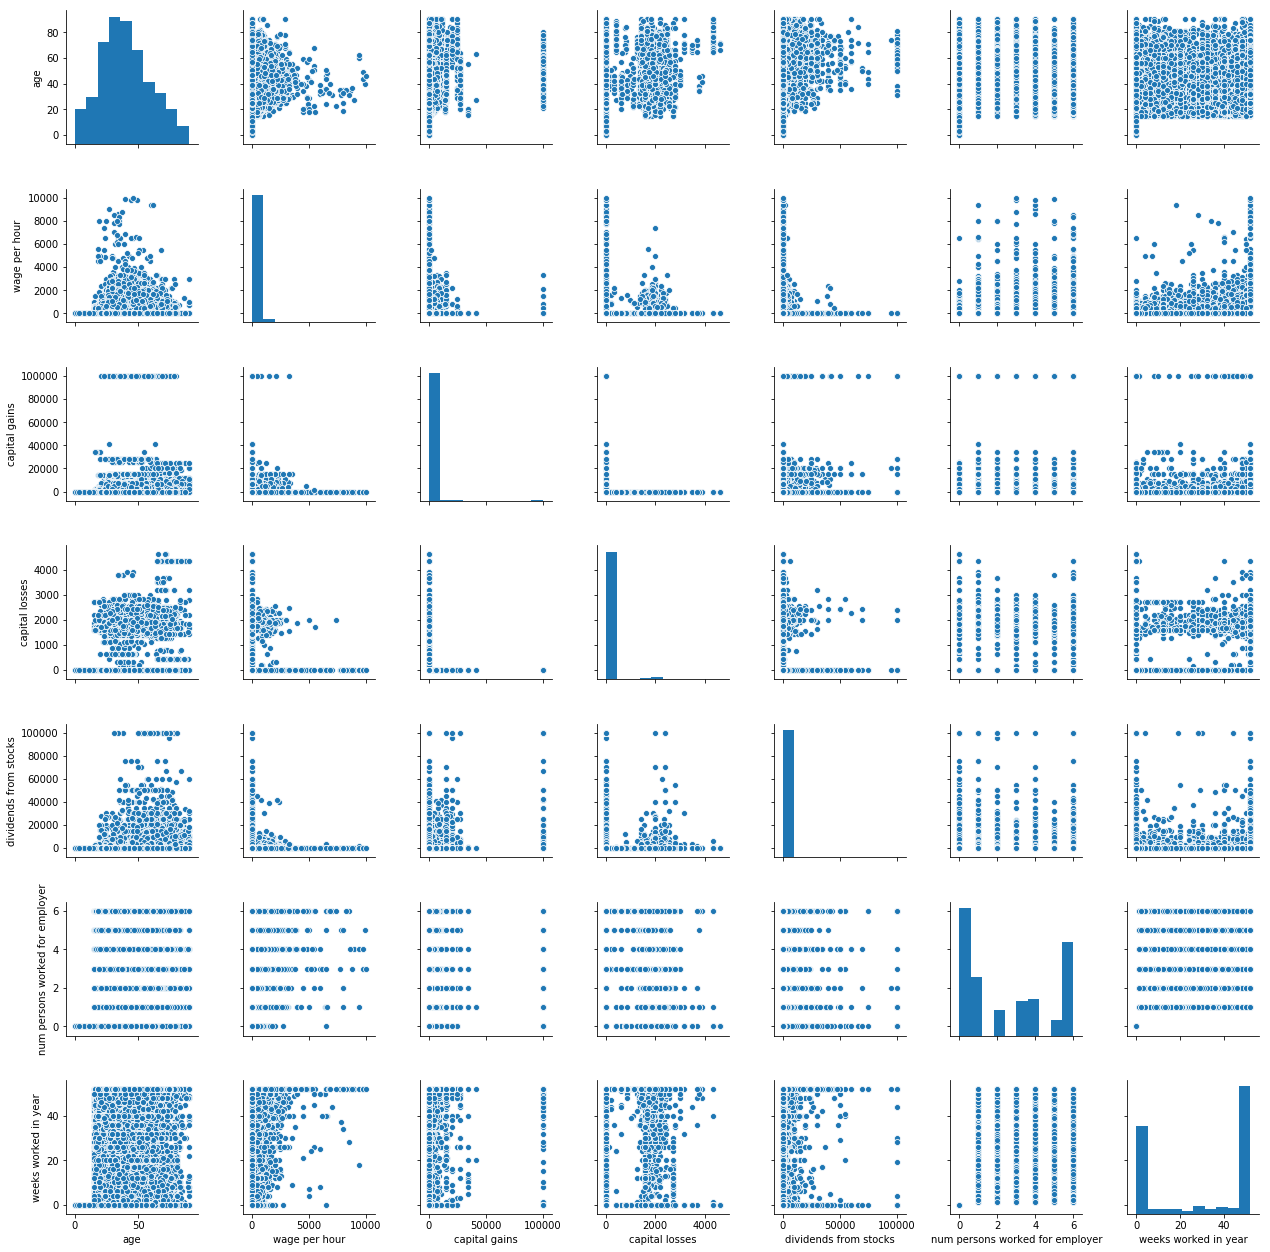

In [17]:
# Plot correlation matrix and the repartition in each continuous feature
continuous_values = df_census_learn.describe().columns.tolist()
dataset = df_census_learn[continuous_values]
continuous_values = ['age',
                     'wage per hour',
                     'capital gains',
                     'capital losses',
                     'dividends from stocks',
                     'num persons worked for employer',
                     'weeks worked in year'
                    ]

df_continuous_learn = df_census_learn[continuous_values]
df_continuous_test = df_census_test[continuous_values]


sns.pairplot(df_continuous_learn)

In [18]:
# See the correlation with numbers
df_continuous_learn.corr()

,age,wage per hour,capital gains,capital losses,dividends from stocks,num persons worked for employer,weeks worked in year
age,1.000000,-0.014831,0.040996,0.039643,0.105794,-0.081331,-0.030516
wage per hour,-0.014831,1.000000,-0.006905,0.002478,-0.011968,0.159975,0.163201
capital gains,0.040996,-0.006905,1.000000,-0.016701,0.129131,0.039367,0.067168
capital losses,0.039643,0.002478,-0.016701,1.000000,0.038487,0.056583,0.072629
dividends from stocks,0.105794,-0.011968,0.129131,0.038487,1.000000,-0.019656,-0.016919
num persons worked for employer,-0.081331,0.159975,0.039367,0.056583,-0.019656,1.000000,0.671853
weeks worked in year,-0.030516,0.163201,0.067168,0.072629,-0.016919,0.671853,1.000000


### C.2 - Categorical Variables

1. Change categories to dummy variables
2. Show correlation matrix for some of them
3. Merge Dummy variables dataframe to the actual datasets (train & test) and drop outdated columns

In [19]:
categorical_values = df_census_learn.columns.tolist()
for value in continuous_values:
    categorical_values.remove(value)
categorical_values.remove('revenue')

In [20]:
# create dummy variables
df_dummy_learn = pd.get_dummies(df_census_learn[categorical_values])
df_dummy_test = pd.get_dummies(df_census_test[categorical_values])

df_dummy_learn.head()

,detailed industry recode,detailed occupation recode,own business or self employed,veterans benefits,year,class of worker_ Federal government,class of worker_ Local government,class of worker_ Never worked,class of worker_ Not in universe,class of worker_ Private,class of worker_ Self-employed-incorporated,class of worker_ Self-employed-not incorporated,class of worker_ State government,class of worker_ Without pay,education_ 10th grade,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,education_ 5th or 6th grade,education_ 7th and 8th grade,education_ 9th grade,...,country of birth self_ Peru,country of birth self_ Philippines,country of birth self_ Poland,country of birth self_ Portugal,country of birth self_ Puerto-Rico,country of birth self_ Scotland,country of birth self_ South Korea,country of birth self_ Taiwan,country of birth self_ Thailand,country of birth self_ Trinadad&Tobago,country of birth self_ United-States,country of birth self_ Vietnam,country of birth self_ Yugoslavia,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_ Native- Born in the United States,fill inc questionnaire for veteran's admin_ No,fill inc questionnaire for veteran's admin_ Not in universe,fill inc questionnaire for veteran's admin_ Yes
0,0,0,0,2,95,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,4,34,0,2,94,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,0,0,0,2,95,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,0,0,0,0,94,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,94,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [21]:
test_columns = [
    'veterans benefits',
    'class of worker_ Federal government',
    'class of worker_ Local government',
    'class of worker_ Never worked',
    'class of worker_ Not in universe',
    'class of worker_ Private',
    'class of worker_ Self-employed-incorporated',
    'class of worker_ Self-employed-not incorporated',
    'class of worker_ State government',
    'class of worker_ Without pay',
    'major industry code_ Agriculture',
 'major industry code_ Armed Forces',
 'major industry code_ Business and repair services',
 'major industry code_ Communications',
 'major industry code_ Construction',
 'major industry code_ Education',
 'major industry code_ Entertainment',
 'major industry code_ Finance insurance and real estate',
 'major industry code_ Forestry and fisheries',
 'major industry code_ Hospital services',
 'major industry code_ Manufacturing-durable goods',
 'major industry code_ Manufacturing-nondurable goods',
 'major industry code_ Medical except hospital',
 'major industry code_ Mining',
 'major industry code_ Not in universe or children',
 'major industry code_ Other professional services',
 'major industry code_ Personal services except private HH',
 'major industry code_ Private household services',
 'major industry code_ Public administration',
 'major industry code_ Retail trade',
 'major industry code_ Social services',
 'major industry code_ Transportation',
 'major industry code_ Utilities and sanitary services',
 'major industry code_ Wholesale trade',
 'major occupation code_ Adm support including clerical',
 'major occupation code_ Armed Forces',
 'major occupation code_ Executive admin and managerial',
 'major occupation code_ Farming forestry and fishing',
 'major occupation code_ Handlers equip cleaners etc ',
 'major occupation code_ Machine operators assmblrs & inspctrs',
 'major occupation code_ Not in universe',
 'major occupation code_ Other service',
 'major occupation code_ Precision production craft & repair',
 'major occupation code_ Private household services',
 'major occupation code_ Professional specialty',
 'major occupation code_ Protective services',
 'major occupation code_ Sales',
 'major occupation code_ Technicians and related support',
 'major occupation code_ Transportation and material moving'
]

In [22]:
cor_categorical = df_dummy_learn[test_columns].corr()
cor_categorical

,veterans benefits,class of worker_ Federal government,class of worker_ Local government,class of worker_ Never worked,class of worker_ Not in universe,class of worker_ Private,class of worker_ Self-employed-incorporated,class of worker_ Self-employed-not incorporated,class of worker_ State government,class of worker_ Without pay,major industry code_ Agriculture,major industry code_ Armed Forces,major industry code_ Business and repair services,major industry code_ Communications,major industry code_ Construction,major industry code_ Education,major industry code_ Entertainment,major industry code_ Finance insurance and real estate,major industry code_ Forestry and fisheries,major industry code_ Hospital services,major industry code_ Manufacturing-durable goods,...,major industry code_ Public administration,major industry code_ Retail trade,major industry code_ Social services,major industry code_ Transportation,major industry code_ Utilities and sanitary services,major industry code_ Wholesale trade,major occupation code_ Adm support including clerical,major occupation code_ Armed Forces,major occupation code_ Executive admin and managerial,major occupation code_ Farming forestry and fishing,major occupation code_ Handlers equip cleaners etc,major occupation code_ Machine operators assmblrs & inspctrs,major occupation code_ Not in universe,major occupation code_ Other service,major occupation code_ Precision production craft & repair,major occupation code_ Private household services,major occupation code_ Professional specialty,major occupation code_ Protective services,major occupation code_ Sales,major occupation code_ Technicians and related support,major occupation code_ Transportation and material moving
veterans benefits,1.000000,0.036584,0.069092,0.015763,-0.407414,0.285741,0.043372,0.071270,0.049878,0.010276,0.042067,0.001723,0.058256,0.026776,0.060365,0.072359,0.031241,0.061954,0.009953,0.049110,0.075115,...,0.049651,0.107079,0.039614,0.047746,0.025674,0.047175,0.099477,0.001723,0.088365,0.042944,0.049912,0.063114,-0.405107,0.088988,0.079915,0.021721,0.096533,0.028670,0.086919,0.042115,0.049077
class of worker_ Federal government,0.036584,1.000000,-0.032306,-0.007017,-0.103027,-0.131848,-0.020665,-0.033596,-0.023594,-0.004574,-0.018262,0.109979,-0.023115,-0.010705,-0.019259,-0.009446,-0.010000,-0.016177,0.073257,0.033850,-0.024279,...,0.380206,-0.040362,0.001669,0.174196,-0.000314,-0.020754,0.119537,0.109979,0.060354,-0.014274,-0.006421,-0.021559,-0.103596,-0.016794,-0.006175,-0.009968,0.044151,0.020883,-0.032666,0.036879,-0.007720
class of worker_ Local government,0.069092,-0.032306,1.000000,-0.011602,-0.170347,-0.218000,-0.034168,-0.055548,-0.039011,-0.007563,-0.030972,-0.003553,-0.040907,-0.019726,-0.009942,0.524401,0.026688,-0.032526,-0.004653,0.008249,-0.057169,...,0.242615,-0.080656,0.022124,-0.015136,0.082401,-0.034894,0.063210,-0.003553,0.006657,-0.018491,-0.015200,-0.041572,-0.171287,0.028150,-0.021149,-0.016482,0.231408,0.194394,-0.060891,-0.001456,0.021452
class of worker_ Never worked,0.015763,-0.007017,-0.011602,1.000000,-0.037000,-0.047351,-0.007421,-0.012065,-0.008473,-0.001643,-0.007057,-0.000772,-0.009848,-0.004433,-0.010113,-0.011990,-0.005252,-0.010273,-0.001755,-0.008187,-0.012583,...,-0.008862,-0.017726,-0.006527,-0.008449,-0.004431,-0.007793,-0.016464,-0.000772,-0.014996,-0.007204,-0.008356,-0.010490,0.067734,-0.014700,-0.013635,-0.003580,-0.015884,-0.005264,-0.014448,-0.007130,-0.008251
class of worker_ Not in universe,-0.407414,-0.103027,-0.170347,-0.037000,1.000000,-0.695235,-0.108967,-0.177150,-0.124413,-0.024120,-0.103619,-0.011331,-0.144600,-0.065088,-0.148491,-0.176044,-0.077120,-0.150842,-0.025768,-0.120212,-0.184748,...,-0.130118,-0.260264,-0.095833,-0.124049,-0.065060,-0.114429,-0.241729,-0.011331,-0.220181,-0.105781,-0.122690,-0.154021,0.994514,-0.215839,-0.200202,-0.052564,-0.233213,-0.077285,-0.212136,-0.104688,-0.121147
class of worker_ Private,0.285741,-0.131848,-0.218000,-0.04735

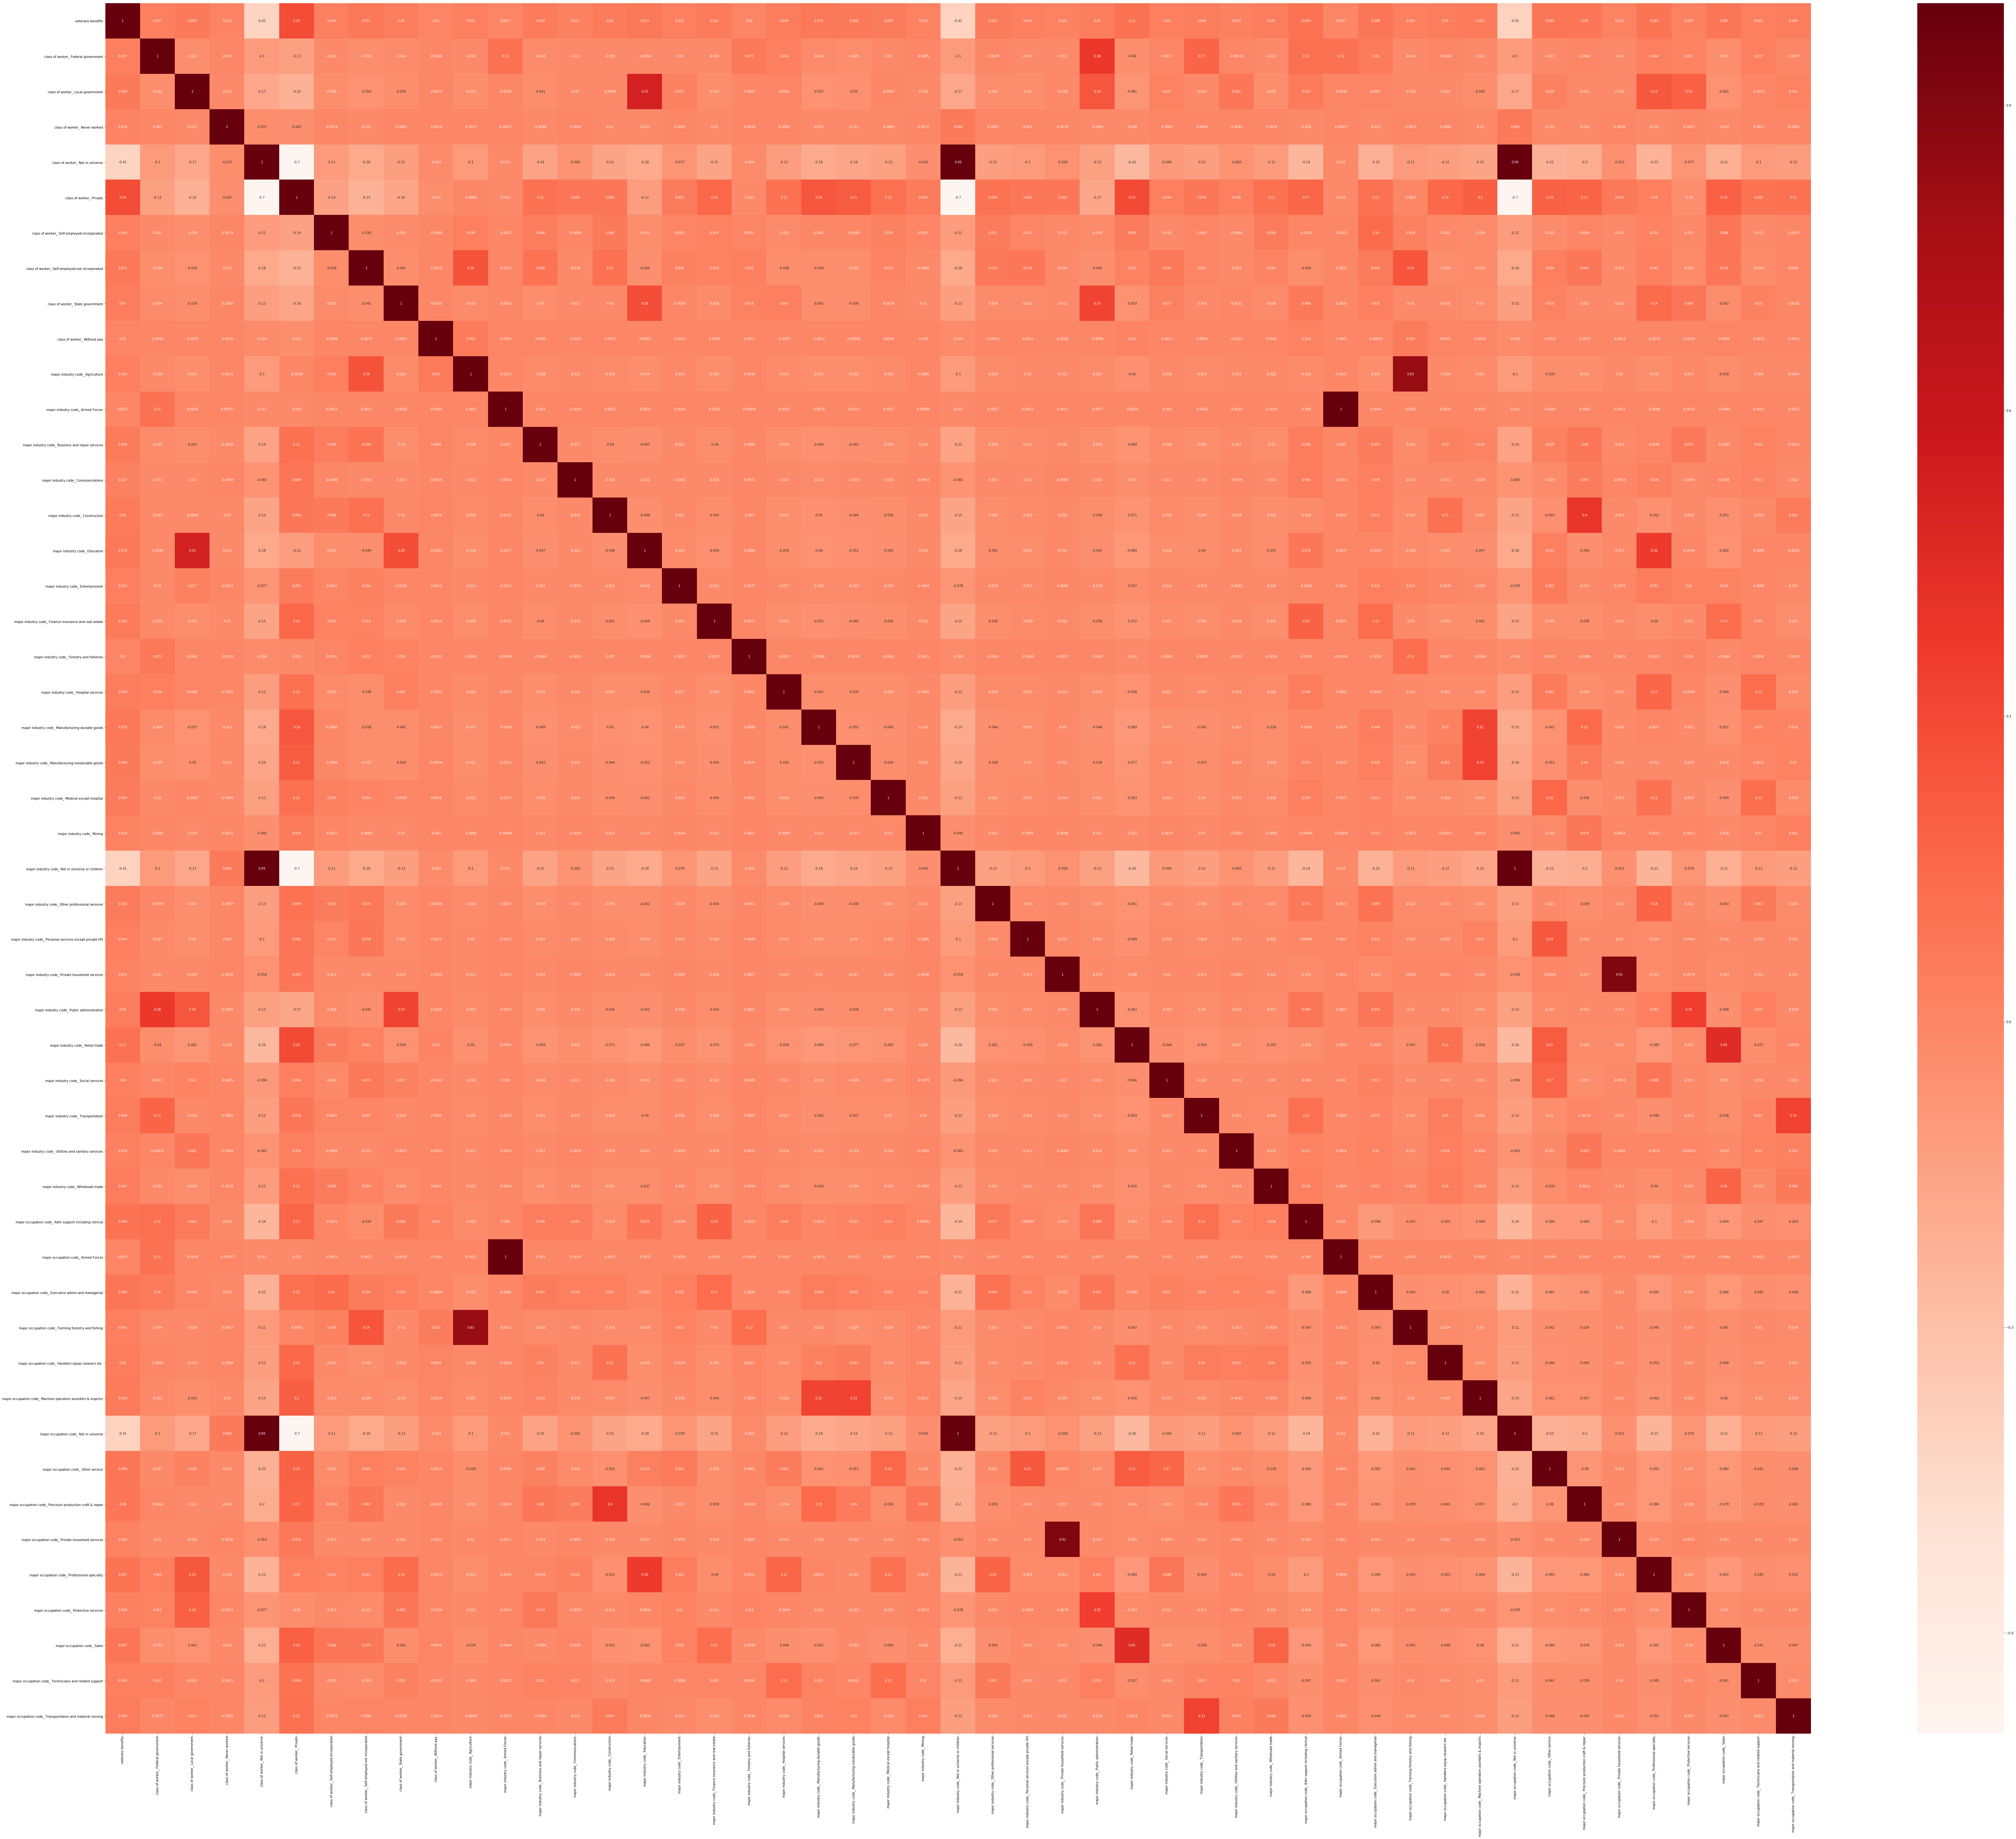

In [23]:
#Using Pearson Correlation for some
plt.figure(figsize=(120,100))
cor_categorical = df_dummy_learn[test_columns].corr(method='pearson')

sns.heatmap(cor_categorical, annot=True, cmap=plt.cm.Reds)

#DOUBLE click on the figure to zoom in/out
plt.show()

### Conclusion (for the correlation Matrix )
    There is no strong correlation that we can consider in order to drop a feature. We will keep all the features we have so far

In [24]:
## Concat the dummies dataframe with the continuous variables one

df_cleaned_train = pd.concat([df_continuous_learn, df_dummy_learn, df_census_learn['revenue']], axis=1)
df_cleaned_test = pd.concat([df_continuous_test, df_dummy_test, df_census_test['revenue']], axis=1)

print("train's shape : ", df_cleaned_train.shape)
print("test's shape : ", df_cleaned_test.shape)

train's shape :  (152368, 373)
test's shape :  (71688, 372)


In [25]:
# They do not have the same number of colmns (because of the dummies variables). 
# We will then drop columns from test that are not in train, and the other way around

cols_in_train_not_in_test = list(set(df_cleaned_train.columns.tolist()) - set(df_cleaned_test.columns.tolist()))
cols_in_test_not_in_train = list(set(df_cleaned_test.columns.tolist()) - set(df_cleaned_train.columns.tolist()))

df_cleaned_train.drop(cols_in_train_not_in_test, axis=1, inplace=True)
df_cleaned_test.drop(cols_in_test_not_in_train, axis=1, inplace=True)

print("train's shape : ", df_cleaned_train.shape)
print("test's shape : ", df_cleaned_test.shape)

train's shape :  (152368, 372)
test's shape :  (71688, 372)


# D- Models

In [26]:
# Datasets

X_features = list(df_cleaned_train.columns[1:-1])
# print("Features selected for the training", X_features)

# Training Data set
y_train = df_cleaned_train['revenue'] #+ df_food_habits.preferences[seuil2:] 
X_train = df_cleaned_train[X_features] #+ df_food_habits[X_features][seuil2:] 

# Validation Data set
X_test = df_cleaned_test[X_features]
y_test = df_cleaned_test['revenue']

### D.1 Random Forest

In [27]:
# Fit
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Predict 
#y_pred_rf = model_rf.score(X_test, y_test)
y_pred_rf = model_rf.predict(X_test)
#mean_absolute_error(y_test, y_predicted)
res = classification_report(y_true=y_test, y_pred=y_pred_rf)
print(res)

C:\Users\benoi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.94      0.98      0.96     65512
           1       0.67      0.37      0.47      6176

   micro avg       0.93      0.93      0.93     71688
   macro avg       0.80      0.67      0.72     71688
weighted avg       0.92      0.93      0.92     71688



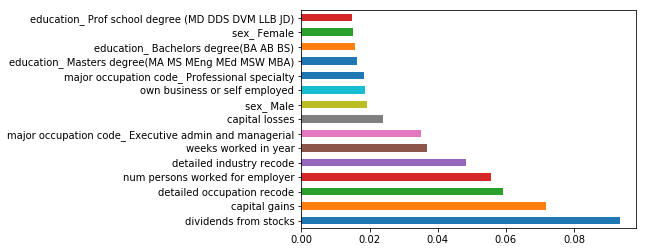

In [28]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

### D.2 AdaBoost

In [29]:
# Fit
model_adb = AdaBoostClassifier()
model_adb.fit(X_train, y_train)

# Predict
#y_pred_adb = model_adb.score(X_test, y_test)
y_pred_adb = model_adb.predict(X_test)

res = classification_report(y_true=y_test, y_pred=y_pred_adb)
print(res)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     65512
           1       0.72      0.37      0.49      6176

   micro avg       0.93      0.93      0.93     71688
   macro avg       0.83      0.68      0.73     71688
weighted avg       0.92      0.93      0.92     71688



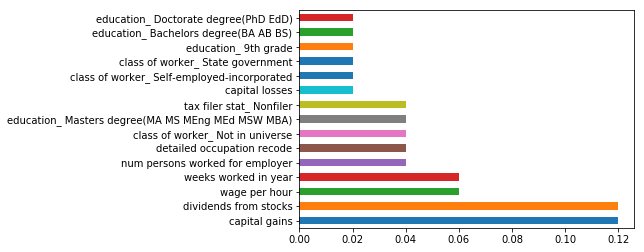

In [30]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model_adb.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

# Conclusion

    The model can be improved. There is 72% precision and only 37% recall for detecting someone that has more than 50 000$ revenue. The AdaBoost model is slightly better in this case. After iterating several times these difference seems to be constant.
    
    The model do not have satisfying enough results. A way to improve it could be not to consider outlayers for some continuous variables and replace them with the means. Or only consider people over a certain age.
    
    
    But so far it gives use insights on what features has the most impact on "Having or not more than 50 000$ revenue". The 4 most important are:
    1. Capital Gain
    2. Dividends from stocks
    3. Detailed Occupation Recode
    4. Weeks work in year